16:24:39 - cmdstanpy - INFO - Chain [1] start processing
16:24:40 - cmdstanpy - INFO - Chain [1] done processing


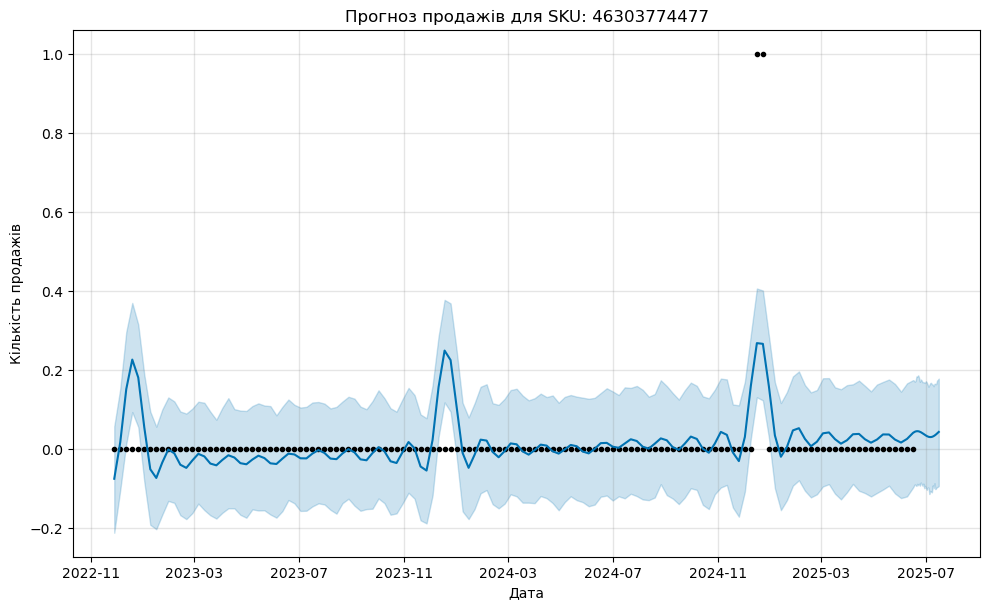

In [5]:
# üì¶ 1. –Ü–º–ø–æ—Ä—Ç –±—ñ–±–ª—ñ–æ—Ç–µ–∫
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
# üìÇ 2. –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è CSV-—Ñ–∞–π–ª—É
csv_path = "/Users/markiianyatsyshyn/Downloads/dataset_pcs - dataset_pcs.csv"
df = pd.read_csv(csv_path)
# üßº 3. –ü–æ–ø–µ—Ä–µ–¥–Ω—è –æ–±—Ä–æ–±–∫–∞
df['ds'] = pd.to_datetime(df['period'])  # –ü–µ—Ä–µ—Ç–≤–æ—Ä—é—î–º–æ –∫–æ–ª–æ–Ω–∫—É –∑ –¥–∞—Ç–æ—é —É —Ñ–æ—Ä–º–∞—Ç datetime
df['y'] = df['qty_total']  # –ö–æ–ª–æ–Ω–∫–∞, —è–∫—É –±—É–¥–µ–º–æ –ø—Ä–æ–≥–Ω–æ–∑—É–≤–∞—Ç–∏

# üìä (–û–ø—Ü—ñ–æ–Ω–∞–ª—å–Ω–æ) –§—ñ–ª—å—Ç—Ä—É—î–º–æ –ø–æ –æ–¥–Ω–æ–º—É SKU
sku_id_to_forecast = df['sku_id'].unique()[0]  # –ë–µ—Ä–µ–º–æ –ø–µ—Ä—à–∏–π SKU —É —Å–ø–∏—Å–∫—É
df_sku = df[df['sku_id'] == sku_id_to_forecast]

# ‚è≥ 4. –°—Ç–≤–æ—Ä—é—î–º–æ —ñ —Ç—Ä–µ–Ω—É—î–º–æ –º–æ–¥–µ–ª—å
model = Prophet()
model.fit(df_sku[['ds', 'y']])

# üìÖ 5. –°—Ç–≤–æ—Ä–µ–Ω–Ω—è –¥–∞—Ç –Ω–∞ 30 –¥–Ω—ñ–≤ —É–ø–µ—Ä–µ–¥
future = model.make_future_dataframe(periods=30)

# üîÆ 6. –ü—Ä–æ–≥–Ω–æ–∑
forecast = model.predict(future)

# üíæ 7. –ó–±–µ—Ä–µ–∂–µ–Ω–Ω—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—É —É CSV
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(
    "/Users/markiianyatsyshyn/Downloads/sales_forecast.csv",
    index=False
)

# üìà 8. –ü–æ–±—É–¥–æ–≤–∞ –≥—Ä–∞—Ñ—ñ–∫–∞
model.plot(forecast)
plt.title(f"–ü—Ä–æ–≥–Ω–æ–∑ –ø—Ä–æ–¥–∞–∂—ñ–≤ –¥–ª—è SKU: {sku_id_to_forecast}")
plt.xlabel("–î–∞—Ç–∞")
plt.ylabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø—Ä–æ–¥–∞–∂—ñ–≤")
plt.show()
